<a href="https://colab.research.google.com/github/Kr207/Final-Assignment/blob/main/IRP_Solar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Assignment for GG3209 - MCE map for site suitability of the creation of a new solar farm in a selected region of the Scottish Borders

* **Student ID:** 220014748

* **Date:** 11/12/24

* **Word count:** 2408

**Abstract:**

What was found is multiple locations that are suitable for a solar farm within degrees of suitability. Direct Normal Irradiation and Slope were graded the highest suitability factor at 30% respectfully and so this meant that the highest areas of suitability were in unshaded and relatively flat ground. Among with other criteria and factors, this map shows that a solar farm could be built in the northern most section of the sample areas

**Keywords:** [Solarfarm. Vector. Raster. Multiple Criteria Evaluation map. Python. Agriculture. Solar availability]

# GitHub Repository
- **GitHub Link:** https://github.com/Kr207/Final-Assignment.git

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:**

* Introduction
* Methodology
* Results
* Discussion
* Conclusion


## Introduction
Renewable energy is seen as a primary solution for our exploitative use of fossil fuels. Solar energy is underscored as one of the key drivers in the transition to renewable energy. Within this report I have aimed to show where there is potential for a new solar farm to be built in the southern border region of Scotland (near Dunns). With the ever-increasing need for innovation and adaptability within the renewable energy operations I shall use a MCE map to visualise areas suitable for the construction of a solar farm in the Scottish Borders


Aim:
My main aim for this project was to discover areas of suitability for the building of a new solar farm within the Scottish Borders. This included 4 factors and 4 constraints including, slope, distance from watercourses, distance to roads, land capability for agriculture, potentially vulnerable areas of flooding, built up areas, special areas of conservation and importantly levels of direct normal irradiation (solar radiation that reaches the direct surface).

Research Questions:
1.	What is the suitability of a building a new solar farm within the Scottish borders? Once found:
2.	Will this solar farm come in competition/conflict with agriculture or residential areas?

Hypotheses:

H1 Solar farms are most suitable in areas with high solar radiation.

H2 Solar farms are more suitable in flat or gently sloping terrain.

H3 Solar farms are not suitable in the same areas that are suited to agricultural land capability.


## Methodology




**Data Sources:**

Solar Availability: (Factor)
- Direct Normal Irradiation levels
- found at: https://globalsolaratlas.info/download/united-kingdom
- (Global Solar Atlas, 2024b)

Road network: Solar Availability: (Factor)
- Main roads and small country roads
- found at: https://osdatahub.os.uk/downloads/open/OpenRoads
- (Ordnance Survey, 2024a)

Watercourse network: (Factor)
- Small brooks, streams, rivers and artificially modified watercourses
- found at: https://osdatahub.os.uk/downloads/open/OpenRivers
- (Ordnance Survey, 2024b)

Flooding: (Factor)
- Potentially Vulnerable Areas to flooding dataset as areas
- found at: https://www.sepa.org.uk/environment/environmental-data/
- (SEPA, 2024)

Relief map (Factor)
- showing the gradient of the land
- Scotland DEM (from week 3 -Raster data, interpolation)

Agriculture: (Constraint)
- Scale of Land Capability for Agriculture ranging from class 1 to 7
- found at: https://soils.environment.gov.scot/maps/capability-maps/national-scale-land-capability-for-agriculture/
- (Scotland's Soils, 2024)

Conservation areas: (constraint)
- Land which is protected for conservation purposes and so should therefore not be used
- found at: https://spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/B0D1377C-F580-4FC2-B068-5758541B79E2
- (NatureScot, 2023)

Built up areas: (Constraint)
- Land use occupied by a settlement or unnatural land feature such as buildings, car parks, industrial zones.
-found at: https://osdatahub.os.uk/downloads/open/BuiltUpAreas
- (Ordnance Survey, 2024c)

**Collection procedures:**

Firstly, I wanted to find reliable solar radiation data, I found a source that included Direct Normal Irradiation, Global Horizontal Irradiation and Photovoltaic Power Potential, I decided upon using the DNI (Direct Normal Irradiation average YearlyMonthlyTotals dataset) as not only did this give an annual average for DNI but it also reflected ‘the part of the solar irradiance that directly reaches a surface’ (Global Solar Atlas, 2024b).
Then I needed a reliable relief data to account for the gradient of the land. Solar farms require reasonably flat land. Here I utilised a 500m Digital Elevation Model given to us within week 3 of the GG3209 module. This gave us elevation data to then operate the slope tool in QGIS.
Roads and Watercourse data was found from the OS data service, these were made into factors such as closer to roads and further away from rivers increases suitability of the land in the multi-criterion evaluation.
Potentially vulnerable areas (PVA) of flooding dataset was found through the Scottish Environmental Protection Agency. I decided upon using the potentially vulnerable areas dataset as opposed to flooding datasets more generally as I felt that it offered a better forecast on the potential of climate change induced sea-level rise.
My first constraint was built-up environments. I downloaded the shapefile and inputted this into QGIS. I then made a constraint raster named BUA_C1 to ‘mask’ or hide the areas with the value 1 (e.g. eradicate the areas of built-up environment in preparation for the MCE).
My second constraint was Land Capability for agriculture. I downloaded the geopackage here, rasterised and then used the ‘select features using expression’ tool to select only the prime areas of agriculture within classifications 1 or 2, before this I had trialled using prime areas within classifications 1-3 but this was too large a constraint impacting the effectiveness of the final MCE map output. As classification 3 involves land of good to moderate capability for agriculture with certain crop yield restrictions there is an argument to be made for the advanced benefit of building a solar farm on this land.
My third constraint was Special areas of conservation, this shapefile data was found through the spatialdata.scot website and was inputted into QGIS as a vector file before being rasterised and transformed into a constraint layer. This data included both river and land conservation. I decided to exclude these areas from the multi-criteria evaluation as conservation areas have their own important sustainability agendas for biodiversity and resilience.


**Relevant software tools:**

Factors

For the creation of the factors, I first used the ‘clip by extent’ tool to clip the watercourse, roads, PVA, DNI vector layers to the same extent. For the slope layer I used the ‘clip raster by extent’ tool. I then went through the watercourse, roads, PVA, and DNI vector layers and rasterised them using the ‘rasterize (vector to raster)’ tool. Now I have all five factors as rasters which have now been clipped to the same extent (my study area of the Scottish Borders). I then used the proximity tool to calculate distance to the nearest feature in all five raster layers, before normalising the layers using the f(x)=k*x+n formula for each. Distance from rivers was ranked higher as was distance to roads, the lower the gradient the higher it was ranked, as well as high levels of DNI +760 was ranked higher, distance from PVA was ranked higher also.

Constraints

The Land capability for agriculture data set was subset as outlined above (using the ‘select by expression’ tool), every classification other than 1 and 2 were selected to be excluded within the constraint. BUA, SAC and LAC were all clipped to the same extent as the factors through the ‘clip by extent’ tool, then rasterized using the ‘rasterized (vector to raster)’ tool. After this I used the raster calculator to then create a constraint for each layer resulting in a raster 1 to 0 identifying usable and non-usable land.
Once all factor and constraint layers were ready the MCE was created using the raster calculator tool with the formula  (  ( 0.3 * "Slope_Factor@1" )  +  ( 0.3 * "DNI_Factor@1" )  +  ( 0.2 * "Roads_Factor@1" )  +  ( 0.1 * "PVA_Factor@1" )  +  ( 0.1 * "Watercourse_Factor@1" )  )  * "BUA_C1_0@1" * "LCA_C2@1" * "SAC_C3@1". Accounting as 30% for Slope factor, 30% for DNI factor, 20% for Roads factor, 10% for PVA factor, 10% for Watercourse factor and constraints: Built Up Area, Land Capability for Agriculture, and Special Areas of Conservation.

## Results


### Here I mounted my data into the notebook and installed all necessary packages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install lonboard

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer
import os

In [ ]:
pip install rasterio

In [ ]:
import rasterio

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

## Here I investigated the shape and properties of my MCE map

In [ ]:
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/MCE_MAP_CLIPPED.tif') as src:

  MCE_MAP = src.read()

In [ ]:
MCE_MAP = rio.open('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/MCE_MAP_CLIPPED.tif')
print(MCE_MAP.name)
print(MCE_MAP.count)
print(MCE_MAP.width)
print(MCE_MAP.height)
print(MCE_MAP.bounds)
print(MCE_MAP.crs)
#MCE.close()

/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/MCE_MAP_CLIPPED.tif
1
404
291
BoundingBox(left=347052.8103136, bottom=637950.2269469594, right=378625.5260192, top=660726.1462277026)
EPSG:27700


In [ ]:
MCE_MAP.shape

(291, 404)

## Next using the plt.show function I wanted to visualise the dataset.

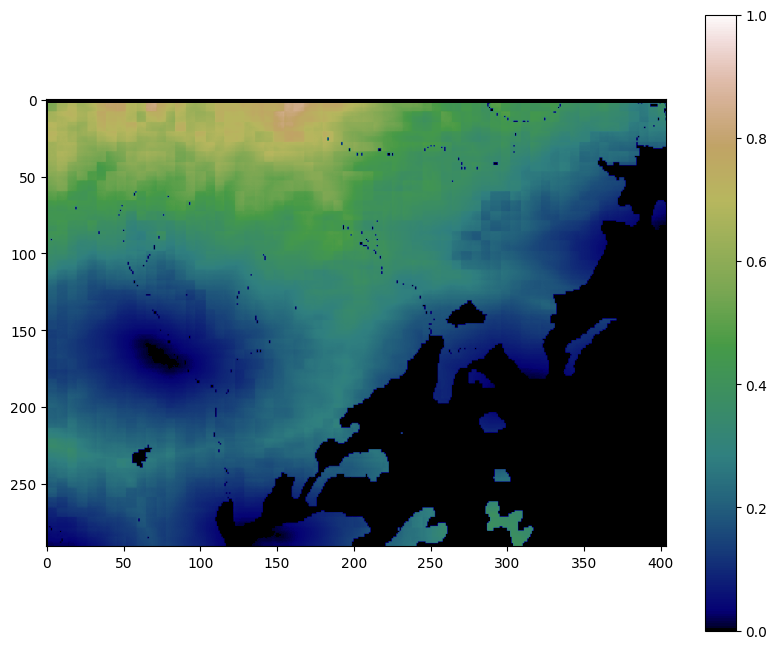

In [ ]:
plt.imshow(MCE_MAP, cmap='gist_earth', vmin=0, vmax=1)
plt.colorbar()
plt.show()

## Next I wanted to visualise this map using different color maps to spot any relevant patterns and make the results of my MCE stand out.

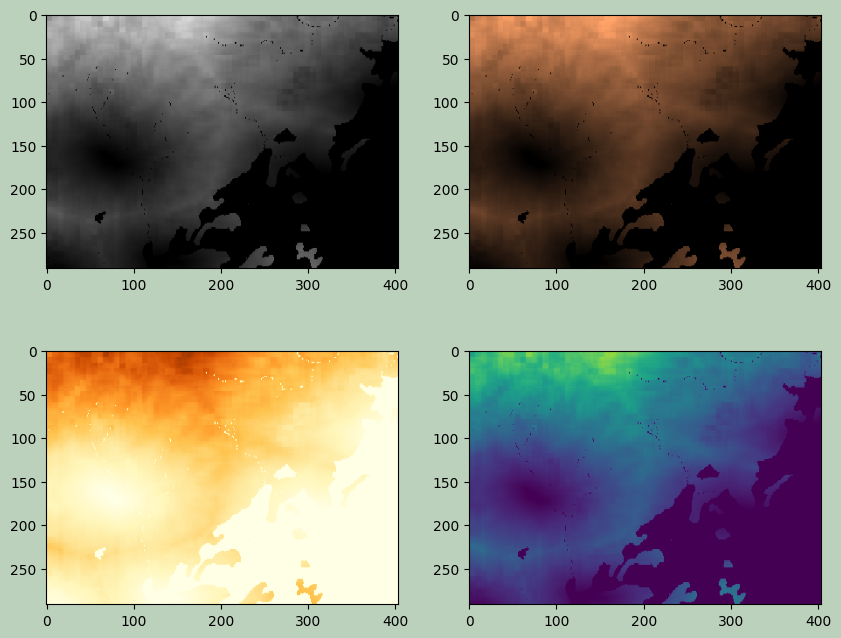

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(MCE_MAP, cmap="gist_gray", vmin=0, vmax=1)
ax[0,1].imshow(MCE_MAP, cmap="copper", vmin=0, vmax=1)
ax[1,0].imshow(MCE_MAP, cmap="YlOrBr", vmin=0, vmax=1)
ax[1,1].imshow(MCE_MAP, cmap="viridis", vmin=0, vmax=1)
fig.patch.set_facecolor('#bcd1bc')

## The factors used in my MCE are visualised here using python.
1. Direct Normal Irradiation
2. Slope
3. Watercourse
4. Roads
5. Potential Vulnerable Areas

In [ ]:
pip install earthpy

In [ ]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio

### 1. DNI

In [ ]:
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/DNI_Factor.tif') as src:

  DNI = src.read(1)

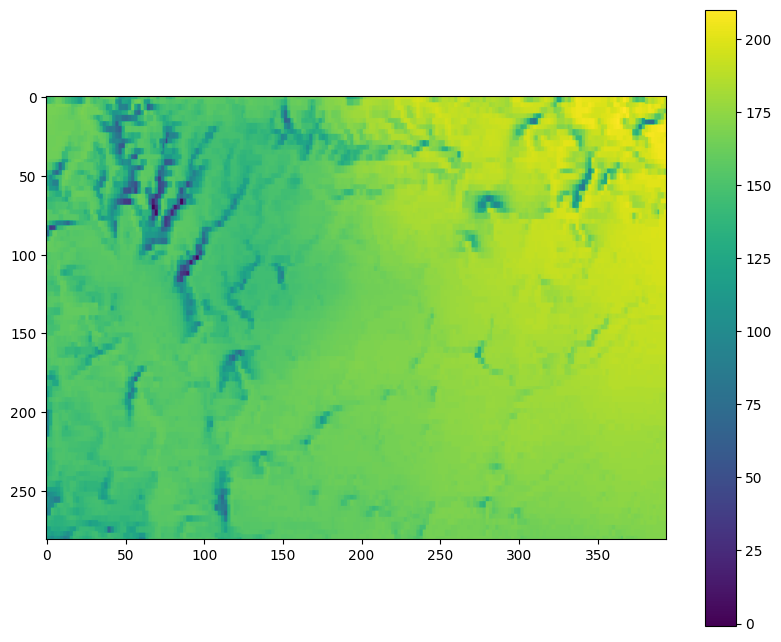

In [ ]:
plt.imshow(DNI, cmap='viridis', vmin=-0.7, vmax=210)
plt.colorbar()
plt.show()

### 2. Slope

In [ ]:
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/Slope_Factor_1.tif') as src:

  Slope = src.read(1)

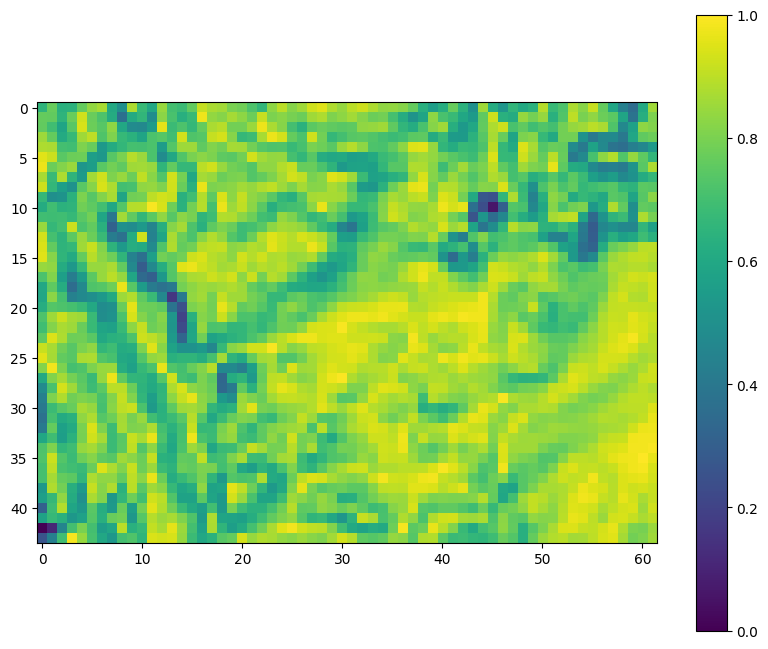

In [ ]:
plt.imshow(Slope, cmap='viridis', vmin=0, vmax=1)
plt.colorbar()
plt.show()

### 3. Watercourse

In [ ]:
Watercourse = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/Watercourse_Extent.shp')
Watercourse.head()

<Axes: >

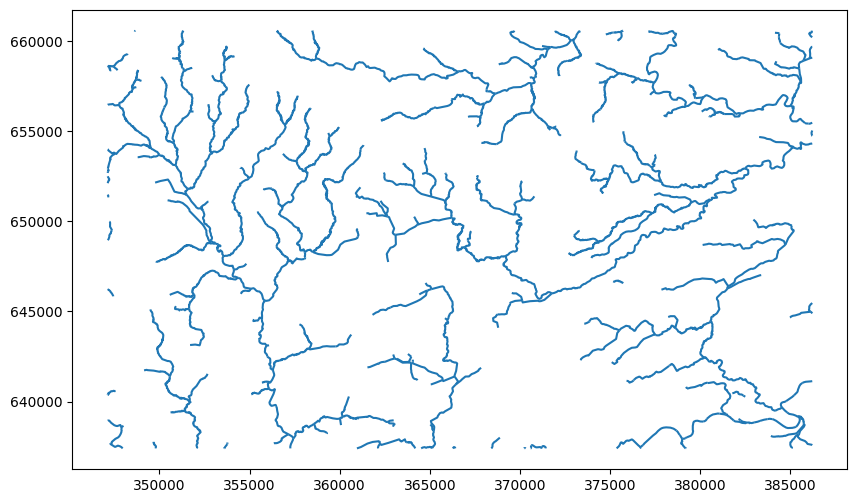

In [ ]:
Watercourse.plot()

### 4. Roads

In [ ]:
Roads = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/Roads_Extent.shp')
Roads.head()

<Axes: >

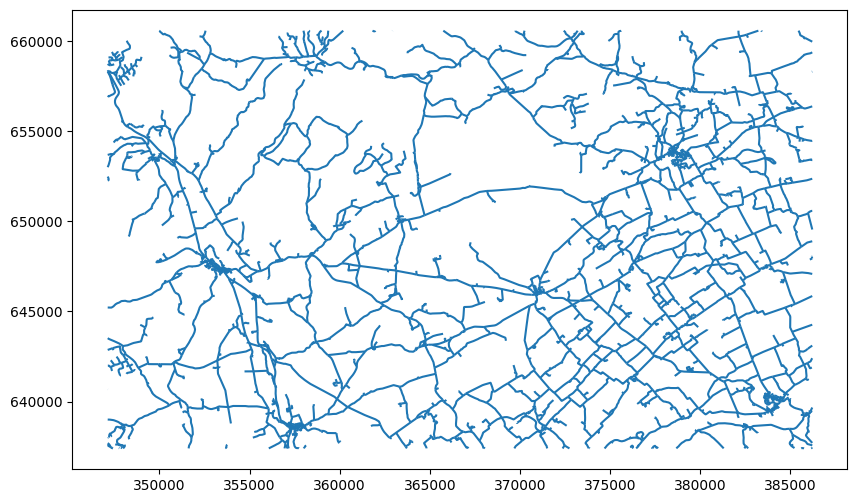

In [ ]:
Roads.plot()

### 5. Potentially Vulnerable Areas

In [ ]:
PVA = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/PVA_Extent.shp')
PVA.head()

<Axes: >

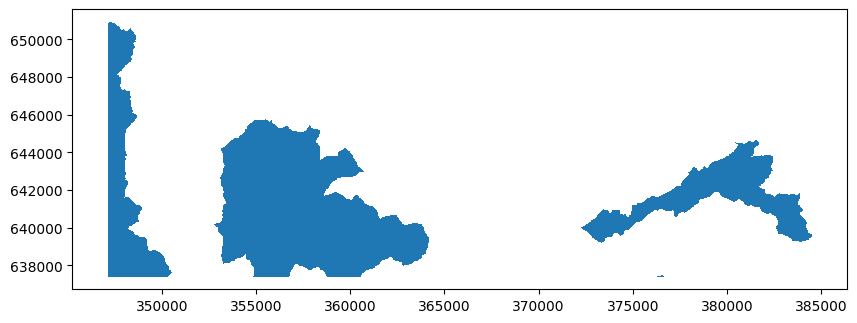

In [ ]:
PVA.plot()

## The constraints used in my MCE are visualised here using python.

6. Land Capability for Agriculture
7. Special Areas of Conservation
8. Built Up Areas

### 6. Land Capability for Agriculture

In [ ]:
LCA = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/LCA_Prime.shp')
LCA.head()

<Axes: >

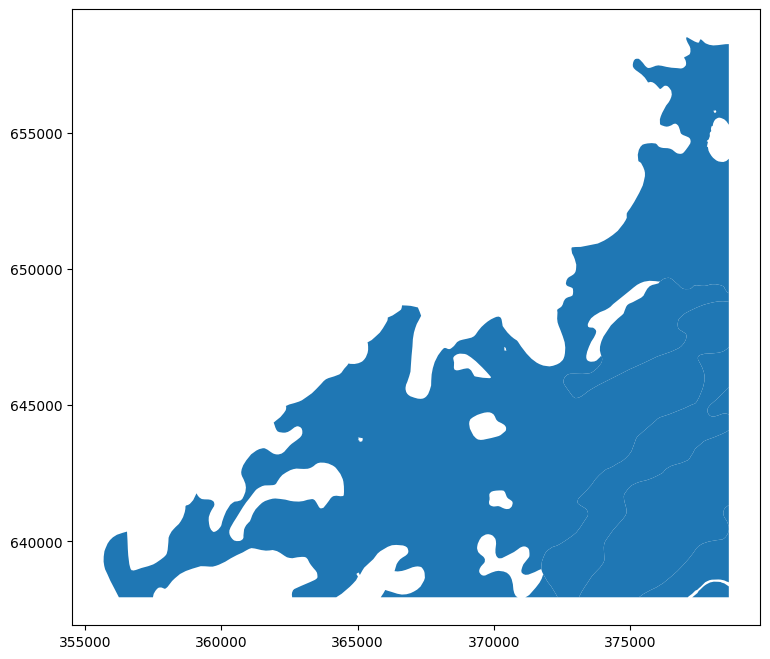

In [ ]:
LCA.plot()

### 7. Special Areas of Conservation

In [ ]:
SAC= gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/SAC_Extent.shp')
SAC.head()

<Axes: >

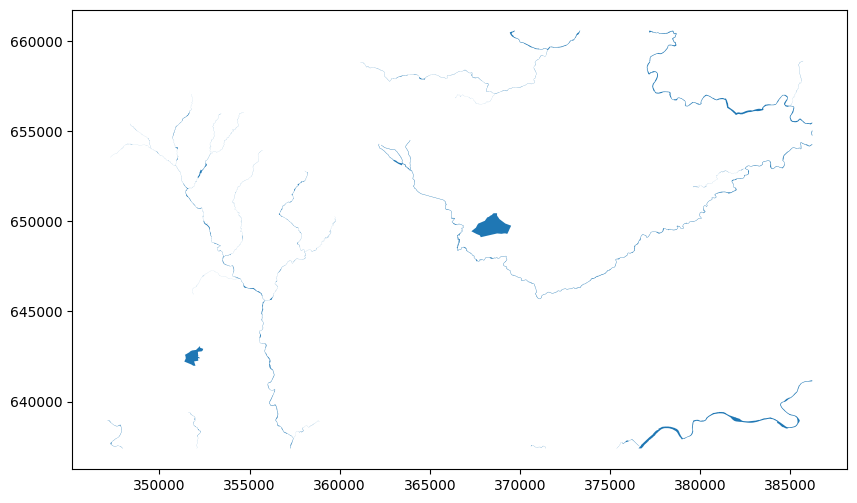

In [ ]:
SAC.plot()

### 8. Built Up Areas

In [ ]:
BUA = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Final Assignment/BUA_Extent.shp')
BUA.head()

<Axes: >

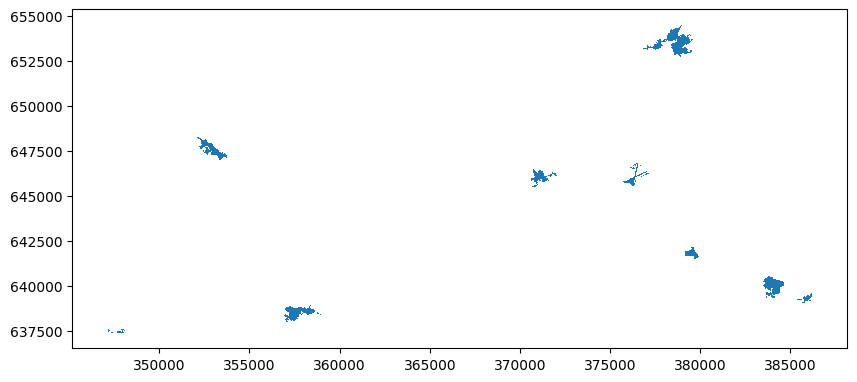

In [ ]:
BUA.plot()

### I decided to input an image file of my MCE map displaying the suitability of building a solar farm in the Scottish borders area directly from QGIS.


In [ ]:
pip install pillow

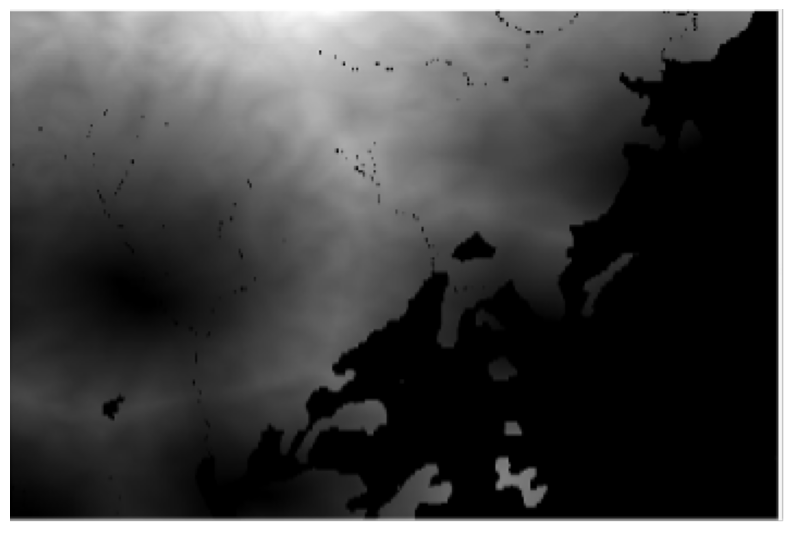

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()

As we can see here, the site suitability for a new solar farm based on the 8 factors and constraints is clearer in the previous code of (see at the start of methods):

[plt.imshow(MCE_MAP, cmap='gist_earth', vmin=0, vmax=1)

plt.colorbar()

plt.show()]

## Discussion

My multi-criteria evaluation included criteria which aligned with Palmer, Gottschalg and Betts (2019) criteria in their study into site suitability regarding ‘future scope of large-scale solar in the UK’ including flooding, rivers, urban areas, agricultural land classification and national parks. These align strongly with the eight factors and constraints that I have chosen as part of my MCE map.
With renewable energy sources such as solar being pushed as a solution to satisfy increase ‘global power demands’ (Tinsley, Froidevaux and Jones, 2024) there is growing concern over negative biodiversity impacts (Rehbein et al., 2020). Large-scale solar projects have been at the centre of the discourse surrounding ecological impacts, these include: habitat loss, fragmentation (Smallwood, 2022), alteration of the local microclimate (Armstrong, Ostle and Whitaker, 2016) and animal behavioural changes (Chock et al., 2020). This knowledge influenced my inclusion of the special areas of conservation constraint as ‘siting wind turbines away from ‘ecologically sensitive areas’ is already recognised as an important measure to limit negative impacts on biodiversity’ (Tinsley, Froidevaux and Jones, 2024) supported by Johnson and Stephens (2011). With this in mind this follows my constraint being areas of conservation being eradicated from my MCE.

Slope is an important factor in Solarfarm site selection. There are several opinions as to what gradient of land is truly the best for the maximum solar potential. While some say flat land is best due to construction ease (Asakereh, Soleymani and Sheikhdavoodi, 2017) some urge that a slight tilt in gradient is useful particularly in areas of direct sunlight coming from a certain angle for large proportions of the day. With this ‘little agreement… as to the maximum physical slope for a solar farm build to be considered’, however generally these figures range from 1.15 to 6.28 degrees (Palmer, Gottschalg and Betts, 2019). Supported here then the hypothesis that either flat or gently sloped land is thought to be optimum for energy creation within a solar farm.
In the Bangladesh case study conducted by Rana and Moniruzzaman (2024) for the site suitability of a solar photovoltaic power plant they outline nine criteria including both Direct Normal Irradiation (DNI) and Global Horizontal Irradiation (GHI). It would have perhaps been sensible within this MCE to include GHI data in addition to DNI, while DNI gives us a reasonably decent idea of which surfaces gain direct solar energy, it would be interesting to see the effect of the solar energy that has been diffused into the atmosphere within atmospheric feedback loops. As we can synthesise areas of high DNI are needed for the maximisation of solar energy impacting positively the suitability of a solar farm in DNI high regions. In this MCE we can see that the DNI is higher to the right of the sample area with this reducing gradually towards the left. As Asakereh, Soleymani and Sheikhdavoodi (2017) explain ‘the greater the amount of solar insolation in a given area, the greater the potential of electricity generation’, supported by Arnette and Zobel (2011). In areas of hill shade the level is significantly lower and unsuitable. As the areas of high DNI are largely intersect within the prime areas of land capability for agriculture this makes suitability within this MCE map demanding.

Watercourses and potentially vulnerable areas were chosen as factors due to areas of intense flooding not being suitable for the construction of a new solar farms due to ‘hydrology risks’ susceptibility of destruction and threat to ‘long-term viability’ (Yılmaz, Dinçer and Ayhan, 2023). This factor is particularly relevant in the case of rising sea-levels due to climate change, inducing not only more hydrological events but more extreme hydrological events.

The distance to roads was particularly important here not only for construction and access but also the presence of roads is a good indicator to electricity routes which is required by solarfarms to help generate but also to store the energy effectively. Within this sample area there was an extensive road network and so this did not limit suitability greatly.

The impact on agriculture is the most cited conflict (along with conservation) within solar farm construction. Areas with moderate drainage, high levels of sunlight and low-gradient land while being suitable for solar farms are also the prime areas for agriculture. With food insecurity on the rise there is a dire need to prioritise food creation in these areas. The construction of a solar farm in one of these prime agricultural areas could be detrimental to the total output of stock from the land. As Goldberg (2023) stipulates ‘farmland will still likely be a primary target for solar expansion’ with the same land criteria required for both.

With reflection upon the literature, within my proposed site I would argue for small scale project and on land with a gentle slope angled towards the largest source of solar radiation. Not only would the construction of this site transfer increased energy into the grid but also as it would be small scale effects to wildlife and conservation would be limited.

## Conclusion

**In answering the research questions:**

There is limited suitability for the construction of a solar farm in this sampled area of the Scottish Borders.
The site proposed for the construction of a new solar farm (mid-northern area of the are) will not come into competition with prime agricultural land or residential areas

**In response to my suggested hypotheses:**

H1 Solar farms are most suitable in areas with high solar radiation.
We must accept this hypothesis as through the literature we have found that solarfarms require high levels of solar radiation, including DNI but additionally GHI.

H2 Solar farms are more suitable in flat or gently sloping terrain.
We must accept this hypothesis, however there is conflicts of interest over the requirement to have completely flat ground as solar farms can also be suitable on gentle slopes or heavier slopes if directed towards the main source of solar radiation.

H3 Solar farms are not suitable in the same areas of agricultural land capability.
We must reject this hypothesis, as areas of that are suited towards agriculture are also suited well to solar farm requirements, such as sunlight, gently sloping land, and lack of flooding.


In conclusion, while within this sample area there is generally low suitability for the creation of a new solar farm (primarily due to the competition of agriculture, hillshade and presence of potentially vulnerable areas) there are opportunities for site selection in the northern most section of the area. This area promotes high DNI, reasonably flat land and good road networks nearby.

## References

Armstrong, A., Ostle, N.J. and Whitaker, J. (2016). Solar park microclimate and vegetation management effects on grassland carbon cycling. Environmental Research Letters, [online] 11(7), p.074016. doi:https://doi.org/10.1088/1748-9326/11/7/074016.

Arnette, A.N. and Zobel, C.W. (2011). Spatial analysis of renewable energy potential in the greater southern Appalachian mountains. Renewable Energy, [online] 36(11), pp.2785–2798. doi:https://doi.org/10.1016/j.renene.2011.04.024.

Asakereh, A., Soleymani, M. and Sheikhdavoodi, M.J. (2017). A GIS-based Fuzzy-AHP method for the evaluation of solar farms locations: Case study in Khuzestan province, Iran. Solar Energy, [online] 155, pp.342–353. doi:https://doi.org/10.1016/j.solener.2017.05.075.

Chock, R.Y., Clucas, B., Peterson, E.K., Blackwell, B.F., Blumstein, D.T., Church, K., Fernández‐Juricic, E., Francescoli, G., Greggor, A.L., Kemp, P., Pinho, G.M., Sanzenbacher, P.M., Schulte, B.A. and Toni, P. (2020). Evaluating potential effects of solar power facilities on wildlife from an animal behavior perspective. Conservation Science and Practice, [online] 3(2). doi:https://doi.org/10.1111/csp2.319.

Global Solar Atlas (2024a). Global Solar Atlas. [online] globalsolaratlas.info. Available at: https://globalsolaratlas.info/support/faq [Accessed 3 Dec. 2024].

Global Solar Atlas (2024b). Global Solar Atlas. [online] globalsolaratlas.info. Available at: https://globalsolaratlas.info/download/united-kingdom [Accessed 2 Dec. 2024].

Goldberg, Z.A. (2023). Solar energy development on farmland: Three prevalent perspectives of conflict, synergy and compromise in the United States. Energy Research & Social Science, [online] 101, p.103145. doi:https://doi.org/10.1016/j.erss.2023.103145.

Johnson, G.D. and Stephens, S.E. (2011). Wind Power and Biofuels: A Green Dilemma for Wildlife Conservation. Energy Development and Wildlife Conservation in Western North America, [online] pp.131–155. doi:https://doi.org/10.5822/978-1-61091-022-4_8.

NatureScot (2023). Scottish Spatial Data Infrastructure. [online] spatialdata.gov.scot. Available at: https://spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/B0D1377C-F580-4FC2-B068-5758541B79E2 [Accessed 2 Dec. 2024].

Ordnance Survey (2024a). OS Data Hub. [online] osdatahub.os.uk. Available at: https://osdatahub.os.uk/downloads/open/OpenRoads [Accessed 2 Dec. 2024].

Ordnance Survey (2024b). OS Data Hub. [online] osdatahub.os.uk. Available at: https://osdatahub.os.uk/downloads/open/OpenRivers [Accessed 2 Dec. 2024].

Ordnance Survey (2024c). OS Data Hub. [online] Osdatahub.os.uk. Available at: https://osdatahub.os.uk/downloads/open/BuiltUpAreas [Accessed 2 Dec. 2024].

Palmer, D., Gottschalg, R. and Betts, T. (2019). The future scope of large-scale solar in the UK: Site suitability and target analysis. Renewable Energy, [online] 133, pp.1136–1146. doi:https://doi.org/10.1016/j.renene.2018.08.109.

Rana, M.M.S.P. and Moniruzzaman, Md. (2024). Demarcation of suitable site for solar photovoltaic power plant installation in Bangladesh using geospatial techniques. Next Energy, [online] 3, p.100109. doi:https://doi.org/10.1016/j.nxener.2024.100109.

Rehbein, J.A., Watson, J.E.M., Lane, J.L., Sonter, L.J., Venter, O., Atkinson, S.C. and Allan, J.R. (2020). Renewable energy development threatens many globally important biodiversity areas. Global Change Biology, [online] 26(5), pp.3040–3051. doi:https://doi.org/10.1111/gcb.15067.

Scotland's Soils (2024). National scale land capability for agriculture | Scotland’s soils. [online] soils.environment.gov.scot. Available at: https://soils.environment.gov.scot/maps/capability-maps/national-scale-land-capability-for-agriculture/ [Accessed 3 Dec. 2024].

SEPA (2024). Environmental data | Scottish Environment Protection Agency (SEPA). [online] www.sepa.org.uk. Available at: https://www.sepa.org.uk/environment/environmental-data/ [Accessed 2 Dec. 2024].

Smallwood, K.S. (2022). Utility‐scale solar impacts to volant wildlife. The Journal of Wildlife Management, [online] 86(4). doi:https://doi.org/10.1002/jwmg.22216.

Tinsley, E., Froidevaux, J.S.P. and Jones, G. (2024). The location of solar farms within England’s ecological landscape: Implications for biodiversity conservation. Journal of Environmental Management, [online] 372, p.123372. doi:https://doi.org/10.1016/j.jenvman.2024.123372.

Yılmaz, K., Dinçer, A.E. and Ayhan, E.N. (2023). Exploring flood and erosion risk indices for optimal solar PV site selection and assessing the influence of topographic resolution. Renewable Energy, [online] 216, p.119056. doi:https://doi.org/10.1016/j.renene.2023.119056.